Assignment 1: Brian Manesis, 19350386

Task 1: Discrete Fourier Transform (DFT)

Signal Creation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Fs = 200 # Sampling frequency
t = 1 # Duration of audio signal
N = Fs * t # Number of sample points

sample = np.zeros(N) # Sample points

fun_Amplitude = 1 # Amplitude of Fundemental signal
fun_freq = 10 # Fundemental frequency
N_harmonics = 3 # Number of Harmonics

harmonic_Amplitudes = [0.5, 0.25, 0.75] # Amplitudes of Harmonics
harmonic_freqs = [20, 30, 40] # Frequencies for harmonics in Hz
phase = 0 # Phase of signal

# Generate the input signal samples
for i in range(N):
    currentSample = fun_Amplitude * np.sin((2*np.pi*fun_freq*i/N) + phase)
    sample[i] = currentSample
    
    # Superimpose next three harmonics onto fundemental signal
    for j in range(N_harmonics):
        sample[i] += harmonic_Amplitudes[j] * np.sin((2*np.pi*harmonic_freqs[j]*i/N) + phase)

Manual DFT Calculation

In [3]:
manual_output = np.zeros(N)

for k in range(N):
    sum = complex(0,0)

    for n in range(N):
        # Calculate the real and imaginary parts of the complex exponential
        realPart = np.cos(2*np.pi*k*n/N)
        imagPart = np.sin(2*np.pi*k*n/N)
        
        # Create the complex exponential
        w = complex(realPart, -imagPart)
        
        # Multiply the sample with the complex exponential and accumulate the sum
        sum += sample[n] * w
    
    # Calculate the magnitude of the sum and store it in the output array
    manual_output[k] = np.abs(sum)

Matrix method

In [4]:
# Create an array to store the complex exponential
complexExp = np.zeros((N, N), complex)

# Calculate the complex exponential for each frequency and sample
for k in range(N):
    for n in range(N):
        complexExp[k][n] = np.exp(-2*np.pi*k*1j*n/N)

# Perform the DFT by matrix multiplication
matrix_output = np.matmul(complexExp, sample)

# Calculate the magnitude of the output
matrix_output = np.abs(matrix_output)

Numpy.fft method

In [5]:
# Perform the Discrete Fourier Transform (DFT)
fft_output = np.abs(np.fft.fft(sample))

Compare times

Can see the matrix and numpy fft methods took less than 0.1s and manual method took 0.1s, so manual is significantly slower

Compare results

In [6]:
np.allclose(manual_output, matrix_output, rtol=1e-5) # Use numpy allclose method to determine if outputs are the same within a tolerance due to float precision error

True

In [7]:
np.allclose(manual_output, fft_output, rtol=1e-5)

True

In [8]:
np.allclose(matrix_output, fft_output, rtol=1e-5)

True

Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

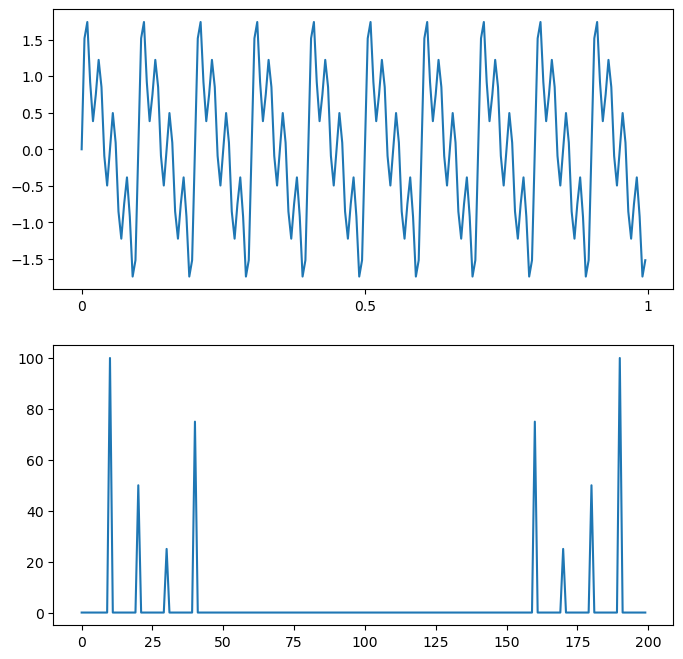

In [9]:
# Plot the input signal and the output of the DFT
figure, axis = plt.subplots(2, figsize=(8, 8))
axis[0].plot(sample)
axis[0].set_xticks([0, N/2, N])
axis[0].set_xticklabels([0, 0.5, t])
axis[1].plot(manual_output)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

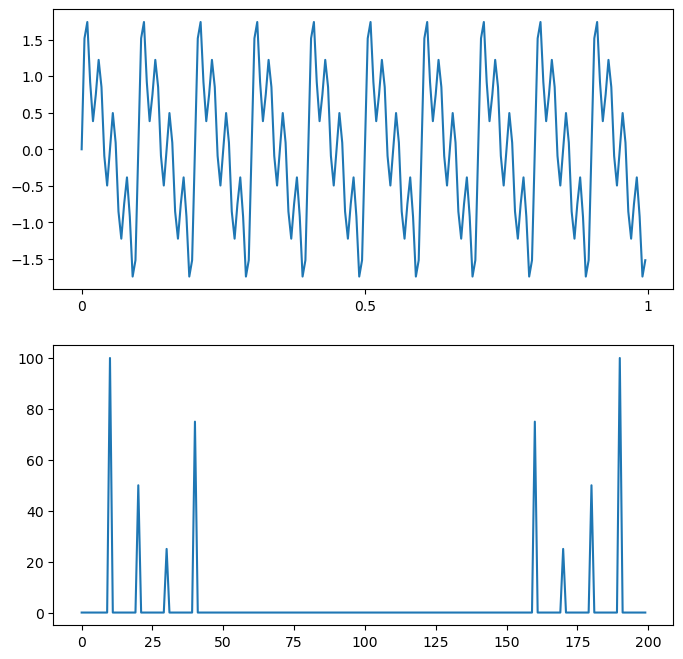

In [10]:
# Plot the input signal and the output of the DFT
figure, axis = plt.subplots(2, figsize=(8, 8))
axis[0].plot(sample)
axis[0].set_xticks([0, N/2, N])
axis[0].set_xticklabels([0, 0.5, t])
axis[1].plot(matrix_output)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

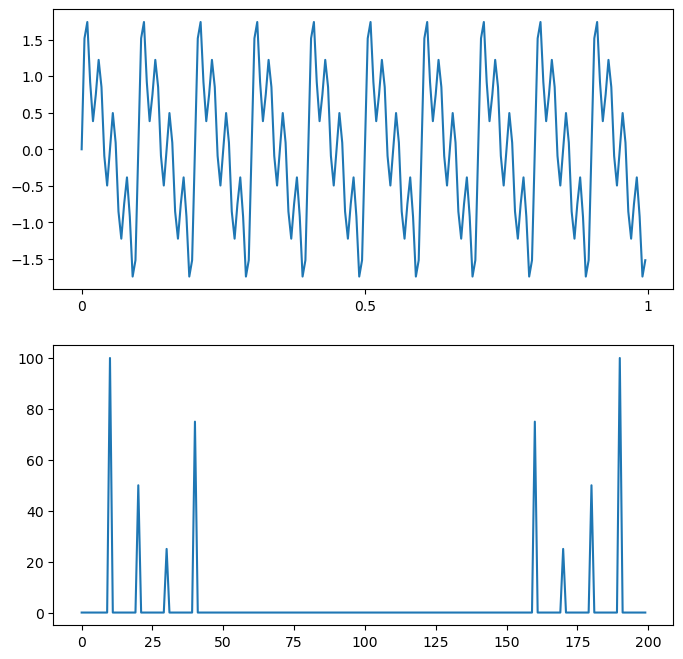

In [11]:
# Plot the input signal and the output of the DFT
figure, axis = plt.subplots(2, figsize=(8, 8))
axis[0].plot(sample)
axis[0].set_xticks([0, N/2, N])
axis[0].set_xticklabels([0, 0.5, t])
axis[1].plot(fft_output)
plt.show

Task 2: Short-Time Fourier Transform (STFT)

In [12]:
import scipy

In [13]:
Fs = 1000 # Sampling frequency
Fmax = 1000 # End frequency of the chirp
T = 1/Fs
t = np.arange(0, 1, T) # range from 0 to 1 increasing in 1/Fs => Fs samples
Tmax = 10 # Time point when Fmax is specified
chirp = scipy.signal.chirp(t=t, t1=Tmax, f0=0, f1=Fmax)

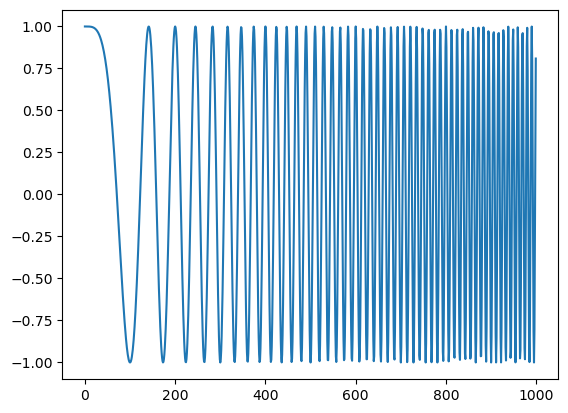

In [14]:
plt.plot(chirp)

In [15]:
chirp_len = len(chirp) # Length of chirp signal
window_len = 100 # Size of the window used on signal
hop_size = window_len // 2 # Number of points to overlap between windows. Half the window length is a common size to use
N_windows = ((chirp_len-window_len) // hop_size) + 1 # Number of windows
hanning_window = np.hanning(window_len) # Hanning window 

stft_output = np.zeros((N_windows, window_len), 'complex') # STFT output, 2D array where column i is the DFT outputs of window i

# Create window starting at index k and ending at k+window_len then
# multiply this window with a hanning window of the same size,
# and calculate the dft of this using numpys fast fourier transform.
# Multiply k by hop_size and create another window from index k*hop_size to k*hop_size + window_len
# This means that the new window overlaps with the previous latter half of the last window
for i in range(N_windows): # 
    index = i*hop_size # Value used to index into signal
    sample_window = chirp[index: index + window_len] * hanning_window # Windowed signal segment
    sample_windowed = np.fft.fft(sample_window) # DFT of windowed signal segment
    stft_output[i, :] = sample_windowed # output i is the DFT output of window created from index to index+window_len

In [16]:
stft_output.shape

(19, 100)

Visualization

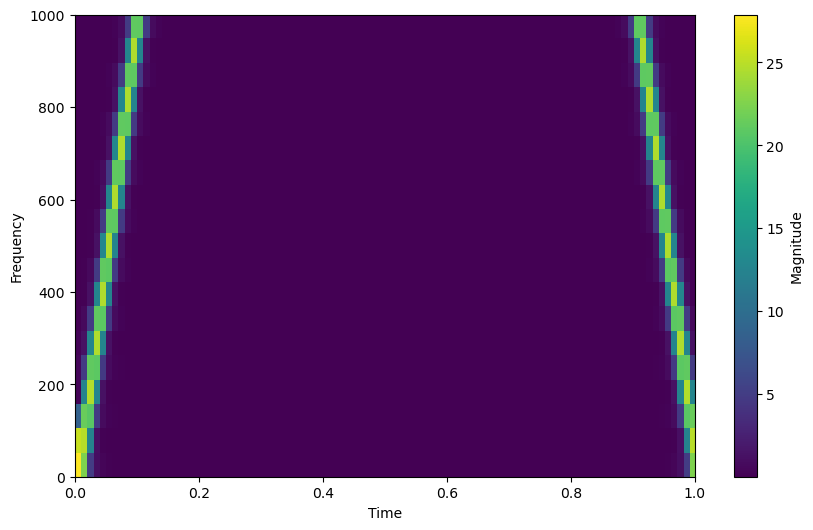

In [17]:
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(stft_output), extent=(0, 1, 0, 1000), aspect='auto', origin='lower') # Create heatmap of 2D array where color is magnitude of element
plt.xlabel('Time') # X axis is from 0-1 second defined in extent
plt.ylabel('Frequency') # Y-axis is frequency from 0-1000 Hz
plt.colorbar(label='Magnitude') # Colour is magnitude
plt.show()